In [3]:
import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [4]:
def SqLeast (x, y, m):
    global G, Phi
    n = len(x)
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    G = PhiT @ Phi
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    return a

def SqLeastRobust (x, y, m):
    
    # robust polinomial approximation (Huber metrics)
    # x, y - data set
    # m - polinom degree 
    
    global G, Phi
    n = len(x)
    yr = np.eye (n)
    E = np.eye (n)
    
    Phi = np.zeros ((n,m+1))
    
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    
    # initial stage
    
    G = PhiT @ Phi
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    
    dist = 1.5
    
    yr = y @ E 
    
    eps = 0.0001
    
    # итерационный процесс
    
    print ()
    print ('Итерационный процесс')
    print ()
    
    for it in range (0, 10):
    
        ait = a  
          
        PhiA = Phi @ a
    
        res = Phi @ a - yr        
          
        for i in range (0, n):
            #print ('it*', it,  y[10], PhiA[i]-dist)
            if (res[i]>dist):
                yr[i] = PhiA[i]-dist
                #print ('it+', it,  y[10], PhiA[i]-dist)
            if (res[i]<-dist):
                yr[i] = PhiA[i]+dist
                #print ('it-', it,  y[10], PhiA[i]-dist)
                    
        z = PhiT @ yr
        a = np.linalg.solve(G, z)
        
        eit = a - ait
        epsit = (sum(eit**2))**0.5/len(eit)
        
        print ('iteration', it, a, epsit)
        
        if (epsit<=eps):
            print ()
            break 
                
    return a


def BasicFunctions (num, x):
    PhiFun = x**num
    return PhiFun

In [5]:
def AppError (x,y,Coefs):
    
    PolynomValue = np.zeros(len(x))
    for i in range (0, m+1):
        PolynomValue += Coefs[i]*x**i
   
    y_av = np.sum(y)/len(x)
    y_disp = np.sum((y-y_av)**2)/len(x)
    
    ResLocal = (y - PolynomValue)
    ResLocalRel = ResLocal/y_disp**0.5
    ResGlobal = (np.sum ((ResLocal)**2)/len(x))**0.5
    ResGlobalRel = ResGlobal / y_disp**0.5
    
    yv_disp = np.sum((PolynomValue-y_av)**2)/len(x)
    
    R2 = yv_disp/y_disp
        
    return ResLocal, ResLocalRel, ResGlobal, ResGlobalRel

def R2 (x, y, Coefs):
    PolynomValue = np.zeros(len(x))
    
    for i in range (0, m+1):
        PolynomValue += Coefs[i]*x**i
   
    y_av = np.sum(y)/len(x)
    y_disp = np.sum((y-y_av)**2)/len(x)    
      
    yv_disp = np.sum((PolynomValue-y_av)**2)/len(x)
    
    R2 = yv_disp/y_disp
        
    return R2

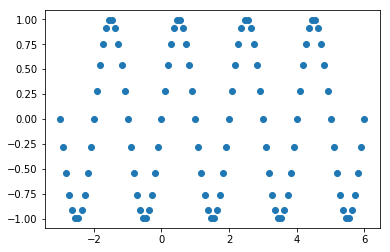

In [6]:
xleft = -3
xright = 6
n = 100
x = np.linspace(xleft,xright,n)
yf = np.zeros ((n))
y = np.zeros ((n))
yf = np.sin(np.pi*x)
plt.plot (x,yf, 'o')

4.0


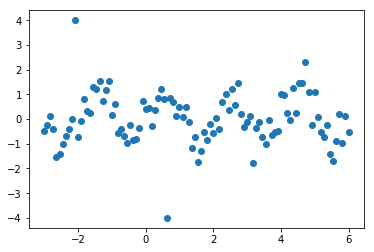

In [7]:
Delta = 0.5 * np.random.randn(len(x))
y = yf + Delta
y_av = np.sum(y)/len(x)

y [10] = 4.
#y [20] = -2.
y[40]=-4
#y[66]=6
#y [1] = -3
#y[-1]=5

plt.plot (x, y, 'o')

print (y[10])

In [12]:
def model(x,y,yf,m):
    PolynomCoefs = SqLeast (x, y, m)
    print ('Коэффициенты SqLeast ', PolynomCoefs)
    cond = np.linalg.cond (G)
    condPhi = np.linalg.cond (Phi)
    EigG = np.linalg.eigvals (G)
    print ('Числа обусловленности матриц G и Phi', cond, condPhi)
    PolynomValue = np.zeros(len(x))
    for i in range (0, m+1):
        PolynomValue += PolynomCoefs[i]*x**i
    RobustCoefs = SqLeastRobust (x, y, m)
    print ('Коэффициенты Robust ', PolynomCoefs)
    cond = np.linalg.cond (G)
    condPhi = np.linalg.cond (Phi)
    EigG = np.linalg.eigvals (G)
    print ('Числа обусловленности матриц G и Phi', cond, condPhi)
    PolynomRobust = np.zeros(len(x))
    for i in range (0, m+1):
        PolynomRobust += RobustCoefs[i]*x**i
    #plt.plot (x, y, 'o')
    plt.plot(x,yf,'g-',label="истинное значение")
    plt.plot (x, PolynomValue,'c-.',label="SqLeast")
    plt.legend(bbox_to_anchor=(1.1, 1))
    plt.show()
    
    plt.plot(x,yf,'g-',label="истинное значение")
    plt.plot (x, PolynomRobust,'r--',label="Robust")
    plt.legend(bbox_to_anchor=(1.1, 1))
    plt.show()
    #plt.plot (x, y, 'o')
    plt.plot(x,yf,'g-',label="истинное значение")
    plt.plot (x, PolynomRobust,'r--',label="Robust")
    plt.plot (x, PolynomValue,'c-.',label="SqLeast")
    plt.legend(bbox_to_anchor=(1.1, 1))
    plt.show()

Коэффициенты SqLeast  [-1.05715411e-01  1.81473549e+00  3.03105703e-01 -3.68187447e+00
  2.65199562e-01  1.90177271e+00 -4.63942384e-01 -3.76470920e-01
  2.05669779e-01  2.86225279e-03 -3.71532589e-02  1.05593289e-02
  2.19635717e-03 -1.55374878e-03  1.18015444e-04  7.27934121e-05
 -1.66265771e-05  8.75923282e-08  3.52324241e-07 -4.30364339e-08
  1.65662735e-09]
Числа обусловленности матриц G и Phi 4.9218984735007856e+30 2.5244979728801508e+16

Итерационный процесс

iteration 0 [-3.30473509e-02  2.43100754e+00  5.58721174e-01 -4.53744517e+00
 -2.60850880e-02  2.30960486e+00 -3.28985116e-01 -4.69766355e-01
  1.61808109e-01  1.89521412e-02 -2.82489109e-02  7.63621824e-03
  1.32268771e-03 -1.16728182e-03  1.34951497e-04  4.78520998e-05
 -1.38569996e-05  5.18581157e-07  2.23753330e-07 -3.15427874e-08
  1.28747582e-09] 0.05759297297985625
iteration 1 [-2.15833859e-02  2.50315014e+00  5.61359387e-01 -4.62626231e+00
 -2.01380705e-02  2.33541027e+00 -3.31986253e-01 -4.67193979e-01
  1.59428349

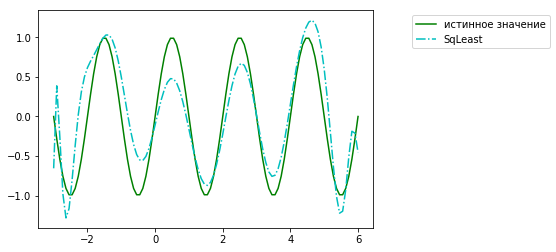

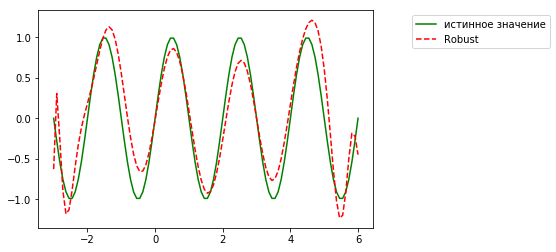

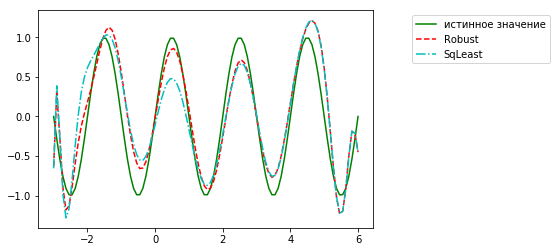

In [23]:
model(x,y,yf,20)